### Airline Data Analysis Using SparkML

In [0]:
import pandas as pd
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StringIndexer

In [0]:
spark.conf.set("spark.sql.shuffle.partitions", sc.defaultParallelism)

#### 1. Load Airline Delay Cancellation data

In [0]:
# Store CSV files and read
path = "/FileStore/tables/2017.csv"

# Load the files into separate DataFrames
df = spark.read.format("csv").option("header", "true").load(path)
df.printSchema()

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: string (nullable = true)
 |-- DEP_TIME: string (nullable = true)
 |-- DEP_DELAY: string (nullable = true)
 |-- TAXI_OUT: string (nullable = true)
 |-- WHEELS_OFF: string (nullable = true)
 |-- WHEELS_ON: string (nullable = true)
 |-- TAXI_IN: string (nullable = true)
 |-- CRS_ARR_TIME: string (nullable = true)
 |-- ARR_TIME: string (nullable = true)
 |-- ARR_DELAY: string (nullable = true)
 |-- CANCELLED: string (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: string (nullable = true)
 |-- CRS_ELAPSED_TIME: string (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: string (nullable = true)
 |-- AIR_TIME: string (nullable = true)
 |-- DISTANCE: string (nullable = true)
 |-- CARRIER_DELAY: string (nullable = true)
 |-- WEATHER_DELAY: strin

In [0]:
display(df.limit(25))

FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,0.0,null,0.0,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,null
2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,0.0,null,0.0,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,null
2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,0.0,null,0.0,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,null
2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,0.0,null,0.0,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,null
2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,0.0,null,0.0,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,null
2017-01-01,AA,7,DFW,OGG,940,1619.0,399.0,12.0,1631.0,2031.0,6.0,1403,2037.0,394.0,0.0,null,0.0,503.0,498.0,480.0,3711.0,394.0,0.0,0.0,0.0,0.0,null
2017-01-01,AA,8,HNL,DFW,1838,1903.0,25.0,19.0,1922.0,636.0,12.0,550,648.0,58.0,0.0,null,0.0,432.0,465.0,434.0,3784.0,25.0,0.0,33.0,0.0,0.0,null
2017-01-01,AA,9,JFK,SFO,700,656.0,-4.0,22.0,718.0,1020.0,3.0,1045,1023.0,-22.0,0.0,null,0.0,405.0,387.0,362.0,2586.0,null,null,null,null,null,null
2017-01-01,AA,10,LAX,JFK,2100,2100.0,0.0,15.0,2115.0,447.0,10.0,527,457.0,-30.0,0.0,null,0.0,327.0,297.0,272.0,2475.0,null,null,null,null,null,null
2017-01-01,AA,12,SFO,JFK,1135,1130.0,-5.0,27.0,1157.0,1937.0,17.0,2018,1954.0,-24.0,0.0,null,0.0,343.0,324.0,280.0,2586.0,null,null,null,null,null,null


#### 2. Data Preprocessing

In [0]:
# Drop unnamed columns
df = df.drop("Unnamed: 27") 

#Convert columns to integer type
cols_to_int = ["CRS_DEP_TIME", "DEP_TIME", "DEP_DELAY", "TAXI_OUT", "WHEELS_OFF", "WHEELS_ON", "TAXI_IN", "CRS_ARR_TIME", "ARR_TIME", "ARR_DELAY", "CANCELLED", "CRS_ELAPSED_TIME", "ACTUAL_ELAPSED_TIME", "AIR_TIME", "DISTANCE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]
for col in cols_to_int:
    df = df.withColumn(col, df[col].cast(IntegerType()))

df_cancelled = df.filter(F.col("CANCELLED")>0)

#Find columns that are null if the flight is cancelled
null_counts = df_cancelled.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).collect()[0].asDict()
df_cancelled_size = df_cancelled.count()
for col in null_counts:
    null_counts[col] = (null_counts[col], round(null_counts[col]/df_cancelled_size*100))
print(null_counts)

{'FL_DATE': (0, 0), 'OP_CARRIER': (0, 0), 'OP_CARRIER_FL_NUM': (0, 0), 'ORIGIN': (0, 0), 'DEST': (0, 0), 'CRS_DEP_TIME': (0, 0), 'DEP_TIME': (80308, 97), 'DEP_DELAY': (80342, 97), 'TAXI_OUT': (82145, 99), 'WHEELS_OFF': (82141, 99), 'WHEELS_ON': (82693, 100), 'TAXI_IN': (82693, 100), 'CRS_ARR_TIME': (0, 0), 'ARR_TIME': (82693, 100), 'ARR_DELAY': (82693, 100), 'CANCELLED': (0, 0), 'CANCELLATION_CODE': (0, 0), 'DIVERTED': (0, 0), 'CRS_ELAPSED_TIME': (7, 0), 'ACTUAL_ELAPSED_TIME': (82693, 100), 'AIR_TIME': (82693, 100), 'DISTANCE': (0, 0), 'CARRIER_DELAY': (82693, 100), 'WEATHER_DELAY': (82693, 100), 'NAS_DELAY': (82693, 100), 'SECURITY_DELAY': (82693, 100), 'LATE_AIRCRAFT_DELAY': (82693, 100)}


In [0]:
#drop colums that are mostly null for cancelled flights
cols_to_drop = [k for k, v in null_counts.items() if v[1] > 90]
df = df.drop(*cols_to_drop)

# Remove records containing null values (exept cancellation code)
cols = df.columns
cols.remove("CANCELLATION_CODE")
df = df.na.drop(subset=cols)

display(df.limit(25))

FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
2017-01-01,AA,1,JFK,LAX,800,1142,0,null,0.0,402,2475
2017-01-01,AA,2,LAX,JFK,900,1727,0,null,0.0,327,2475
2017-01-01,AA,4,LAX,JFK,1130,1958,0,null,0.0,328,2475
2017-01-01,AA,5,DFW,HNL,1135,1612,0,null,0.0,517,3784
2017-01-01,AA,6,OGG,DFW,1855,600,0,null,0.0,425,3711
2017-01-01,AA,7,DFW,OGG,940,1403,0,null,0.0,503,3711
2017-01-01,AA,8,HNL,DFW,1838,550,0,null,0.0,432,3784
2017-01-01,AA,9,JFK,SFO,700,1045,0,null,0.0,405,2586
2017-01-01,AA,10,LAX,JFK,2100,527,0,null,0.0,327,2475
2017-01-01,AA,12,SFO,JFK,1135,2018,0,null,0.0,343,2586


#### 3. Data Analysis

In [0]:
# Top 10 airlines with the most flight operations
display(df.groupBy("OP_CARRIER").count().sort(F.col("count").desc()).limit(10))

OP_CARRIER,count
WN,1329444
DL,923560
AA,896348
OO,706527
UA,584481
EV,339541
B6,298654
AS,185068
NK,156811
F9,103027


Out[8]: <AxesSubplot:ylabel='count'>

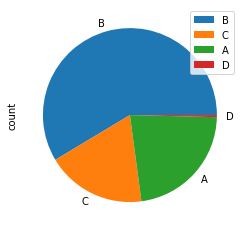

In [0]:
#Visualizing the proportion of the total flight cancellation codes
df.na.drop(subset="CANCELLATION_CODE").groupBy("CANCELLATION_CODE").count()\
.toPandas().set_index("CANCELLATION_CODE").plot.pie(y='count')  

In [0]:
display(df.groupBy("CANCELLED").count())

CANCELLED,count
1,82686
0,5591928


#### 4. Model Prediction

In [0]:
#CANCELLATION_CODE should not be used to predict cancelled flights
df = df.drop("CANCELLATION_CODE")

In [0]:
#Use StringIndexer to convert string labels to label indices
carrier_indexer = StringIndexer(inputCol="OP_CARRIER", outputCol="OP_CARRIER_IDX")
origin_indexer = StringIndexer(inputCol="ORIGIN", outputCol="ORIGIN_IDX")
destination_indexer = StringIndexer(inputCol="DEST", outputCol="DEST_IDX")
df = carrier_indexer.fit(df).transform(df)
df = origin_indexer.fit(df).transform(df)
df = destination_indexer.fit(df).transform(df)
df = df.drop("OP_CARRIER", "ORIGIN", "DEST")
display(df.limit(25))

FL_DATE,OP_CARRIER_FL_NUM,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,OP_CARRIER_IDX,ORIGIN_IDX,DEST_IDX
2017-01-01,1,800,1142,0,0.0,402,2475,2.0,18.0,3.0
2017-01-01,2,900,1727,0,0.0,327,2475,2.0,3.0,18.0
2017-01-01,4,1130,1958,0,0.0,328,2475,2.0,3.0,18.0
2017-01-01,5,1135,1612,0,0.0,517,3784,2.0,4.0,35.0
2017-01-01,6,1855,600,0,0.0,425,3711,2.0,51.0,4.0
2017-01-01,7,940,1403,0,0.0,503,3711,2.0,4.0,51.0
2017-01-01,8,1838,550,0,0.0,432,3784,2.0,35.0,4.0
2017-01-01,9,700,1045,0,0.0,405,2586,2.0,18.0,5.0
2017-01-01,10,2100,527,0,0.0,327,2475,2.0,3.0,18.0
2017-01-01,12,1135,2018,0,0.0,343,2586,2.0,5.0,18.0


In [0]:
#Balance the dataset
major_df = df.filter(F.col("CANCELLED") == 0)
minor_df = df.filter(F.col("CANCELLED") == 1)
ratio = int(major_df.count()/minor_df.count())

sampled_majority_df = major_df.sample(False, 1/ratio, seed=1)
balanced_df = sampled_majority_df.unionAll(minor_df)
display(balanced_df.limit(25))

FL_DATE,OP_CARRIER_FL_NUM,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,OP_CARRIER_IDX,ORIGIN_IDX,DEST_IDX
2017-01-01,143,1140,1549,0,0.0,369,2556,2.0,3.0,35.0
2017-01-01,144,2343,719,0,0.0,336,2556,2.0,35.0,3.0
2017-01-01,292,600,1429,0,0.0,329,2475,2.0,3.0,18.0
2017-01-01,1076,710,958,0,0.0,108,612,2.0,1.0,23.0
2017-01-01,1094,1747,2120,0,0.0,273,1562,2.0,13.0,4.0
2017-01-01,1106,1812,2047,0,0.0,215,1217,2.0,17.0,4.0
2017-01-01,1142,2035,2253,0,0.0,138,802,2.0,4.0,1.0
2017-01-01,1161,2020,2152,0,0.0,92,403,2.0,1.0,37.0
2017-01-01,1165,540,744,0,0.0,124,602,2.0,2.0,6.0
2017-01-01,1273,1436,1800,0,0.0,324,2165,2.0,50.0,4.0


In [0]:
print(balanced_df.filter(F.col("CANCELLED") == 0).count())
print(balanced_df.filter(F.col("CANCELLED") == 1).count())

83390
82686


In [0]:
#Split the data into a 70/30 test and train ratio
train, test = balanced_df.randomSplit([0.7, 0.3], seed=1)
print(train.count(), train.filter(F.col("CANCELLED") == 0).count(), train.filter(F.col("CANCELLED") == 1).count())
print(test.count(), test.filter(F.col("CANCELLED") == 0).count(), test.filter(F.col("CANCELLED") == 1).count())

116386 58541 57845
49690 24849 24841


In [0]:
#Train models

#TODO